<a href="https://colab.research.google.com/github/iRahulPandey/medium-articles/blob/master/Imabalanced_Dataset_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

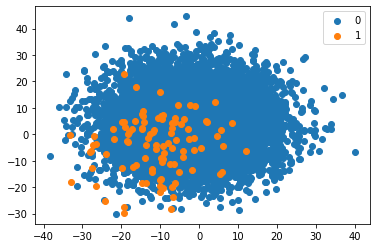

In [87]:
# create and plot synthetic dataset with a given class distribution
from numpy import unique
from numpy import hstack
from numpy import vstack
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_blobs
# create a dataset with a given class distribution
def get_dataset(proportions):
  # determine the number of classes
  n_classes = len(proportions)
  # determine the number of examples to generate for each class
  largest = max([v for k,v in proportions.items()])
  n_samples = largest * n_classes
  # create dataset
  X, y = make_blobs(n_samples=n_samples, centers=n_classes, n_features=2, random_state=1,
  cluster_std=10)
  # collect the examples
  X_list, y_list = list(), list()
  for k,v in proportions.items():
    row_ix = where(y == k)[0]
    selected = row_ix[:v]
    X_list.append(X[selected, :])
    y_list.append(y[selected])
  return vstack(X_list), hstack(y_list)
# scatter plot of dataset, different color for each class
def plot_dataset(X, y):
  # create scatter plot for samples from each class
  n_classes = len(unique(y))
  for class_value in range(n_classes):
    # get row indexes for samples with this class
    row_ix = where(y == class_value)[0]
    # create scatter of these samples
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(class_value))
  # show a legend
  pyplot.legend()
  # show the plot
  pyplot.show()
# define the class distribution
proportions = {0:10000, 1:100}
# generate dataset
X, y = get_dataset(proportions)
# plot dataset
plot_dataset(X, y)

In [116]:
import pandas as pd
df = pd.DataFrame(data = X, columns=['X1','X2'])
df['Class'] = y

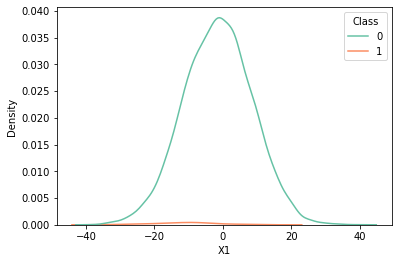

In [117]:
import seaborn as sns
sns.kdeplot(data=df, x="X1", hue="Class",  palette='Set2');

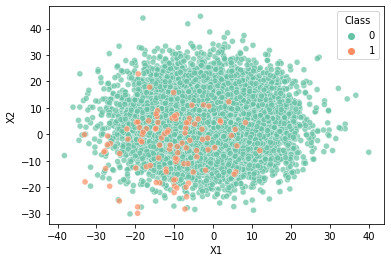

In [93]:
sns.scatterplot(data=df, x="X1", y = "X2", hue="Class",  palette='Set2', edgecolors=None, alpha = 0.7);

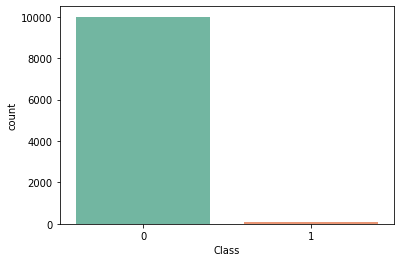

In [95]:
sns.countplot(x = 'Class', data=df, palette='Set2');

In [96]:
from sklearn.model_selection import train_test_split

# get label
labels = df.pop('Class')

# get fearues
features = df

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, stratify = labels, random_state=0)

In [99]:
# sepreting fraud and non-fraud data
bool_train_labels = y_train != 0

# creating seperate features
pos_features = X_train[bool_train_labels]
neg_features = X_train[~bool_train_labels]

# seperate labels
pos_labels = y_train[bool_train_labels]
neg_labels = y_train[~bool_train_labels]

# getting id's of positive cases
ids = np.arange(len(pos_features))

# randomly choosing ids and making it to the size of non-fraud
choices = np.random.choice(ids, len(neg_features))

# generating data
res_pos_features = pos_features.iloc[choices]
res_pos_labels = pos_labels.iloc[choices]

In [100]:
# create a balanced dataset using positive and negative cases
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


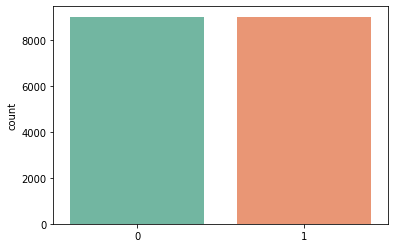

In [101]:
# plot see the new dataset
sns.countplot(resampled_labels, palette='Set2')

In [102]:
df_over = pd.DataFrame(data = resampled_features, columns=['X1','X2'])
df_over['Class'] = resampled_labels

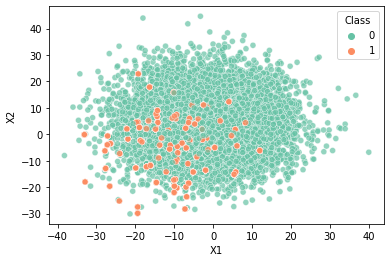

In [103]:
sns.scatterplot(data=df_over, x="X1", y = "X2", hue="Class",  palette='Set2', edgecolors=None, alpha = 0.7);

In [119]:
# Undersmapling the majority class in this case non-fraudlent data
ids = np.arange(len(neg_features))
# randomly choosing ids
choices = np.random.choice(ids, len(pos_features))
# generating data equal to positive class
res_neg_features = neg_features.iloc[choices]
res_neg_labels = neg_labels.iloc[choices]

# concatenate negative and positive class
undersampled_features = np.concatenate([res_neg_features, pos_features], axis=0)
undersampled_labels = np.concatenate([res_neg_labels, pos_labels], axis=0)

order = np.arange(len(undersampled_labels))
np.random.shuffle(order)
undersampled_features = undersampled_features[order]
undersampled_labels = undersampled_labels[order]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


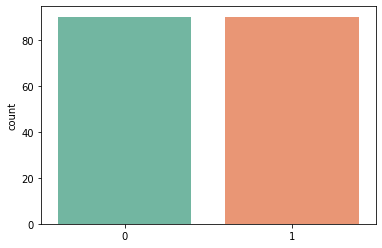

In [120]:
# plot see the new dataset
sns.countplot(undersampled_labels, palette='Set2')

In [121]:
df_under = pd.DataFrame(data = undersampled_features, columns=['X1','X2'])
df_under['Class'] = undersampled_labels

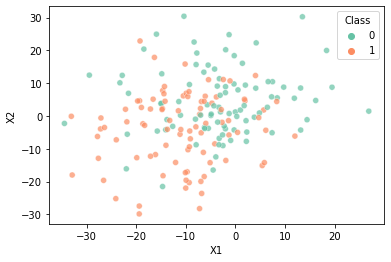

In [122]:
sns.scatterplot(data=df_under, x="X1", y = "X2", hue="Class",  palette='Set2', edgecolors=None, alpha = 0.7);

In [109]:
from imblearn.over_sampling import SVMSMOTE

#create synthesized data
smote_object = SVMSMOTE(random_state=0)
data_X,data_y = smote_object.fit_sample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


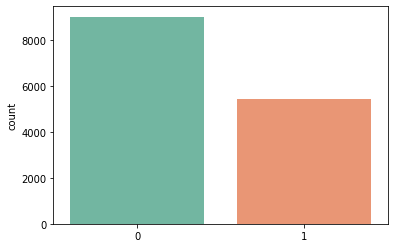

In [110]:
# plot see the new dataset
sns.countplot(data_y, palette='Set2')

In [112]:
df_smote = pd.DataFrame(data = data_X, columns=['X1','X2'])
df_smote['Class'] = data_y

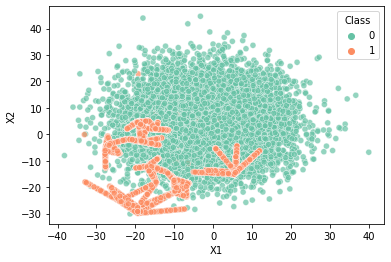

In [113]:
sns.scatterplot(data=df_smote, x="X1", y = "X2", hue="Class",  palette='Set2', edgecolors=None, alpha = 0.7);

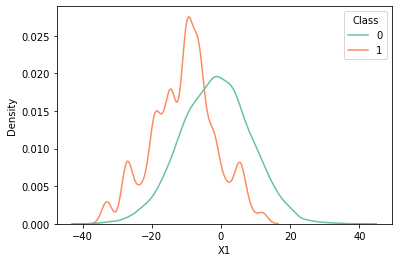

In [126]:
sns.kdeplot(data=df_over, x="X1", hue="Class",  palette='Set2');